# Importing all the necessary libraries

In [2]:
# matplotlib and seaborn for plotting the correlation matrix
import matplotlib.pyplot as mp
import seaborn as sb


# pandas to read and write to/from csv
import pandas as pd


# mysql to make the connectivity with database
import MySQLdb as mysql

# 1) Reading the CSV using pandas

In [3]:
url='https://drive.google.com/file/d/1EHOEilpF4yCBnfCW9Oc1y_ECz65KLQLJ/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)

In [6]:
# display the top 5 rows
df.head()

,date,high,low,Close Price,trade,turnover_in_lakhs,contracts,difference
0,01-Jan-2021,1443.00,1420.60,1425.05,4405469,63155.334220,24302,NaN
1,04-Jan-2021,1438.00,1399.00,1416.00,7870096,111534.732817,40233,NaN
2,05-Jan-2021,1430.75,1409.00,1426.70,7193412,102141.606024,49022,NaN
3,06-Jan-2021,1440.00,1413.10,1420.55,11067025,157545.110102,62408,NaN
4,07-Jan-2021,1432.60,1412.55,1416.25,9947421,141486.233112,47083,NaN


# 2) Renaming the columns 

In [7]:
df.columns=['date', 'high', 'low', 'Close Price', 'trade', 'turnover_in_lakhs', 'contracts', 'difference']

In [8]:
#displaying columns after renaming 
df.head()

,date,high,low,Close Price,trade,turnover_in_lakhs,contracts,difference
0,01-Jan-2021,1443.00,1420.60,1425.05,4405469,63155.334220,24302,NaN
1,04-Jan-2021,1438.00,1399.00,1416.00,7870096,111534.732817,40233,NaN
2,05-Jan-2021,1430.75,1409.00,1426.70,7193412,102141.606024,49022,NaN
3,06-Jan-2021,1440.00,1413.10,1420.55,11067025,157545.110102,62408,NaN
4,07-Jan-2021,1432.60,1412.55,1416.25,9947421,141486.233112,47083,NaN


# 3) Inserting the values in the difference colunns

In [9]:
df.difference=df.high-df.low

In [10]:
#Displaying the changes in the difference column
df.head()

,date,high,low,Close Price,trade,turnover_in_lakhs,contracts,difference
0,01-Jan-2021,1443.00,1420.60,1425.05,4405469,63155.334220,24302,22.40
1,04-Jan-2021,1438.00,1399.00,1416.00,7870096,111534.732817,40233,39.00
2,05-Jan-2021,1430.75,1409.00,1426.70,7193412,102141.606024,49022,21.75
3,06-Jan-2021,1440.00,1413.10,1420.55,11067025,157545.110102,62408,26.90
4,07-Jan-2021,1432.60,1412.55,1416.25,9947421,141486.233112,47083,20.05


# 4) Saving the data into processed_data.csv

In [11]:
df.to_csv('processed_data.csv',index=False)

# 5) Uploading the processed_data.csv into mysql database

In [ ]:
conn = mysql.connect(host='localhost', database='python_fin_test', user='root', password='111PythonFinTest###')
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS processed_data;')
cursor.execute("CREATE TABLE processed_data (date DATE NOT NULL, high FLOAT(6,2) NOT NULL, low FLOAT(6,2) NOT NULL,Close Price FLOAT(6,2) NOT NULL,trade INT NOT NULL, turnover_in_lakhs FLOAT NOT NULL, contracts INT NOT NULL, difference FLOAT(4,2) NOT NULL,PRIMARY KEY(date));")
        

    
for i in zip(df['date'],df['high'],df['low'],df['Close Price'],df['trade'],df['turnover_in_lakhs'],df['contracts'],df['difference']):
    query = 'INSERT INTO Kavin_domain_data (domain,domain_id,email_counts) VALUES'
    q=query+str(i)+';'
    cursor.execute(q)
    # the connection is not auto committed by default, so we must commit to save our changes
    conn.commit()

# 6) Plotting the Correlation Matrix using processed_data.csv

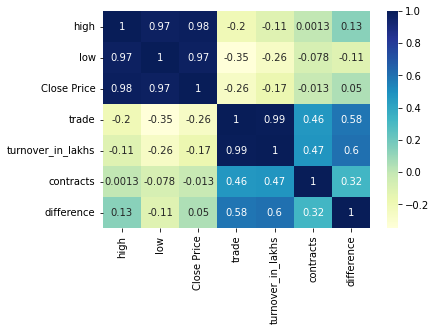

In [63]:
# import file with data
data = pd.read_csv("processed_data.csv")

# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()